In this file, I analyse the output of the model ensemble generated with 'Pb-conc_make-ensemble.py'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import ListedColormap
import xarray as xr


In [2]:
with open('Model_output/20241018-114820_Pb-conc/XGBoost-pb-conc_ensamble_predictions.csv', 'r', newline='') as f:
    ensamble_predictions = pd.read_csv(f)
ensamble_predictions

,WOD_latitude [degrees_north],WOD_longitude [degrees_east],Depth,Salinity,Temperature,Silicate,Nitrate,Phosphate,Oxygen,AOU,...,Pb_conc_rs90,Pb_conc_rs91,Pb_conc_rs92,Pb_conc_rs93,Pb_conc_rs94,Pb_conc_rs95,Pb_conc_rs96,Pb_conc_rs97,Pb_conc_rs98,Pb_conc_rs99
0,-76.5,-179.5,0,34.336,-1.489,66.786,23.699,1.731,329.686,32.191,...,9.694034,8.867017,10.487653,8.300038,10.634048,8.508759,10.935290,7.532992,10.090602,11.214576
1,-76.5,-179.5,5,34.338,-1.504,65.701,23.764,1.726,328.966,32.839,...,9.653005,10.049697,10.249843,8.308929,11.525235,8.254479,12.058458,7.554263,10.198520,11.408661
2,-76.5,-179.5,10,34.340,-1.518,66.094,23.987,1.735,327.762,33.466,...,9.528367,9.998934,10.811822,8.488605,11.378104,8.910063,11.989206,7.521699,10.226632,11.460749
3,-76.5,-179.5,15,34.349,-1.461,66.145,24.062,1.746,326.322,34.773,...,9.446456,10.490206,11.688605,8.579535,12.939796,9.542497,11.827674,9.593513,10.028869,11.292434
4,-76.5,-179.5,20,34.349,-1.469,66.372,24.318,1.761,325.139,36.318,...,9.571826,10.534582,12.314210,8.615536,12.967483,9.443140,11.602295,9.579186,9.970155,11.189031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300568,89.5,179.5,3700,34.953,-0.527,11.339,14.569,1.004,297.053,59.287,...,5.668376,6.028397,6.538578,6.554633,7.365411,6.393357,6.380105,6.882401,6.353239,6.275244
3300569,89.5,179.5,3800,34.952,-0.518,11.356,14.554,1.004,296.844,59.387,...,5.620290,6.029872,6.653698,6.682046,7.489082,6.460521,6.187103,6.869410,6.372490,6.279059
3300570,89.5,179.5,3900,34.954,-0.546,11.325,14.518,1.006,297.770,58.866,...,5.728413,6.298931,6.855389,6.696704,7.519829,6.463437,5.930459,6.758537,7.235190,6.057144
3300571,89.5,179.5,4000,34.942,-0.670,11.228,14.473,1.008,299.008,58.407,...,5.532293,6.116202,6.589932,6.596350,7.254813,6.889154,6.146070,7.406756,6.683648,6.613254


In [3]:
ensamble_predictions['Pb_conc_mean'] = ensamble_predictions[ensamble_predictions.columns[ensamble_predictions.columns.str.startswith('Pb_conc_rs')]].mean(axis=1)
ensamble_predictions['Pb_conc_std'] = ensamble_predictions[ensamble_predictions.columns[ensamble_predictions.columns.str.startswith('Pb_conc_rs')]].std(axis=1)
ensamble_predictions['Pb_conc_CoV'] = ensamble_predictions['Pb_conc_std'] / ensamble_predictions['Pb_conc_mean'] * 100
ensamble_predictions

,WOD_latitude [degrees_north],WOD_longitude [degrees_east],Depth,Salinity,Temperature,Silicate,Nitrate,Phosphate,Oxygen,AOU,...,Pb_conc_rs93,Pb_conc_rs94,Pb_conc_rs95,Pb_conc_rs96,Pb_conc_rs97,Pb_conc_rs98,Pb_conc_rs99,Pb_conc_mean,Pb_conc_std,Pb_conc_CoV
0,-76.5,-179.5,0,34.336,-1.489,66.786,23.699,1.731,329.686,32.191,...,8.300038,10.634048,8.508759,10.935290,7.532992,10.090602,11.214576,9.597363,1.454065,15.150669
1,-76.5,-179.5,5,34.338,-1.504,65.701,23.764,1.726,328.966,32.839,...,8.308929,11.525235,8.254479,12.058458,7.554263,10.198520,11.408661,9.847438,1.539516,15.633675
2,-76.5,-179.5,10,34.340,-1.518,66.094,23.987,1.735,327.762,33.466,...,8.488605,11.378104,8.910063,11.989206,7.521699,10.226632,11.460749,9.830305,1.506480,15.324852
3,-76.5,-179.5,15,34.349,-1.461,66.145,24.062,1.746,326.322,34.773,...,8.579535,12.939796,9.542497,11.827674,9.593513,10.028869,11.292434,10.252644,1.471697,14.354321
4,-76.5,-179.5,20,34.349,-1.469,66.372,24.318,1.761,325.139,36.318,...,8.615536,12.967483,9.443140,11.602295,9.579186,9.970155,11.189031,10.327861,1.458339,14.120437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300568,89.5,179.5,3700,34.953,-0.527,11.339,14.569,1.004,297.053,59.287,...,6.554633,7.365411,6.393357,6.380105,6.882401,6.353239,6.275244,6.606035,0.547551,8.288644
3300569,89.5,179.5,3800,34.952,-0.518,11.356,14.554,1.004,296.844,59.387,...,6.682046,7.489082,6.460521,6.187103,6.869410,6.372490,6.279059,6.612899,0.542730,8.207145
3300570,89.5,179.5,3900,34.954,-0.546,11.325,14.518,1.006,297.770,58.866,...,6.696704,7.519829,6.463437,5.930459,6.758537,7.235190,6.057144,6.728320,0.595538,8.851209
3300571,89.5,179.5,4000,34.942,-0.670,11.228,14.473,1.008,299.008,58.407,...,6.596350,7.254813,6.889154,6.146070,7.406756,6.683648,6.613254,6.628447,0.659866,9.955062


In [4]:
prediction_df_latlon_idxs = ensamble_predictions.set_index(['WOD_latitude [degrees_north]', 'WOD_longitude [degrees_east]', 'Depth'])
prediction_df_latlon_idxs
prediction_xr = xr.Dataset.from_dataframe(prediction_df_latlon_idxs)
prediction_xr

<xarray.Dataset>
Dimensions:                       (WOD_latitude [degrees_north]: 167,
                                   WOD_longitude [degrees_east]: 360, Depth: 102)
Coordinates:
  * WOD_latitude [degrees_north]  (WOD_latitude [degrees_north]) float64 -76....
  * WOD_longitude [degrees_east]  (WOD_longitude [degrees_east]) float64 -179...
  * Depth                         (Depth) int64 0 5 10 15 ... 5300 5400 5500
Data variables: (12/117)
    Salinity                      (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Temperature                   (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Silicate                      (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Nitrate                       (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Phosphate                     (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Oxygen                        (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    ...                            ...
    Pb_conc_rs97                  (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_conc_rs98                  (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_conc_rs99                  (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_conc_mean                  (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_conc_std                   (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...
    Pb_conc_CoV                   (WOD_latitude [degrees_north], WOD_longitude [degrees_east], Depth) float64 ...

In [5]:
lat = prediction_xr.variables['WOD_latitude [degrees_north]'][:]
lon = prediction_xr.variables['WOD_longitude [degrees_east]'][:]

In [6]:
variable_names = list(prediction_xr.keys())

surface_df = {}
intermediate_df = {}
deep_df = {}
bottom_df = {}

for variable in variable_names:
    if variable not in surface_df.keys():
        surface_df[variable] = []
    surface_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 10)[0][0]])
    if variable not in intermediate_df.keys():
        intermediate_df[variable] = []
    intermediate_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 1000)[0][0]])
    if variable not in deep_df.keys():
        deep_df[variable] = []
    deep_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 2500)[0][0]])
    if variable not in bottom_df.keys():
        bottom_df[variable] = []
    bottom_df[variable].append(prediction_xr.variables[variable][:,:,np.where(prediction_xr.variables['Depth'][:] == 4000)[0][0]])


In [7]:
dfs = [surface_df, intermediate_df, deep_df, bottom_df]
ranges = [np.arange(5,20,5), np.arange(900,1150,50), np.arange(1900,2200,100), np.arange(3800,4300,100)]
titles =['10 m', '1000 m', '2500 m', '4000 m']

/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3

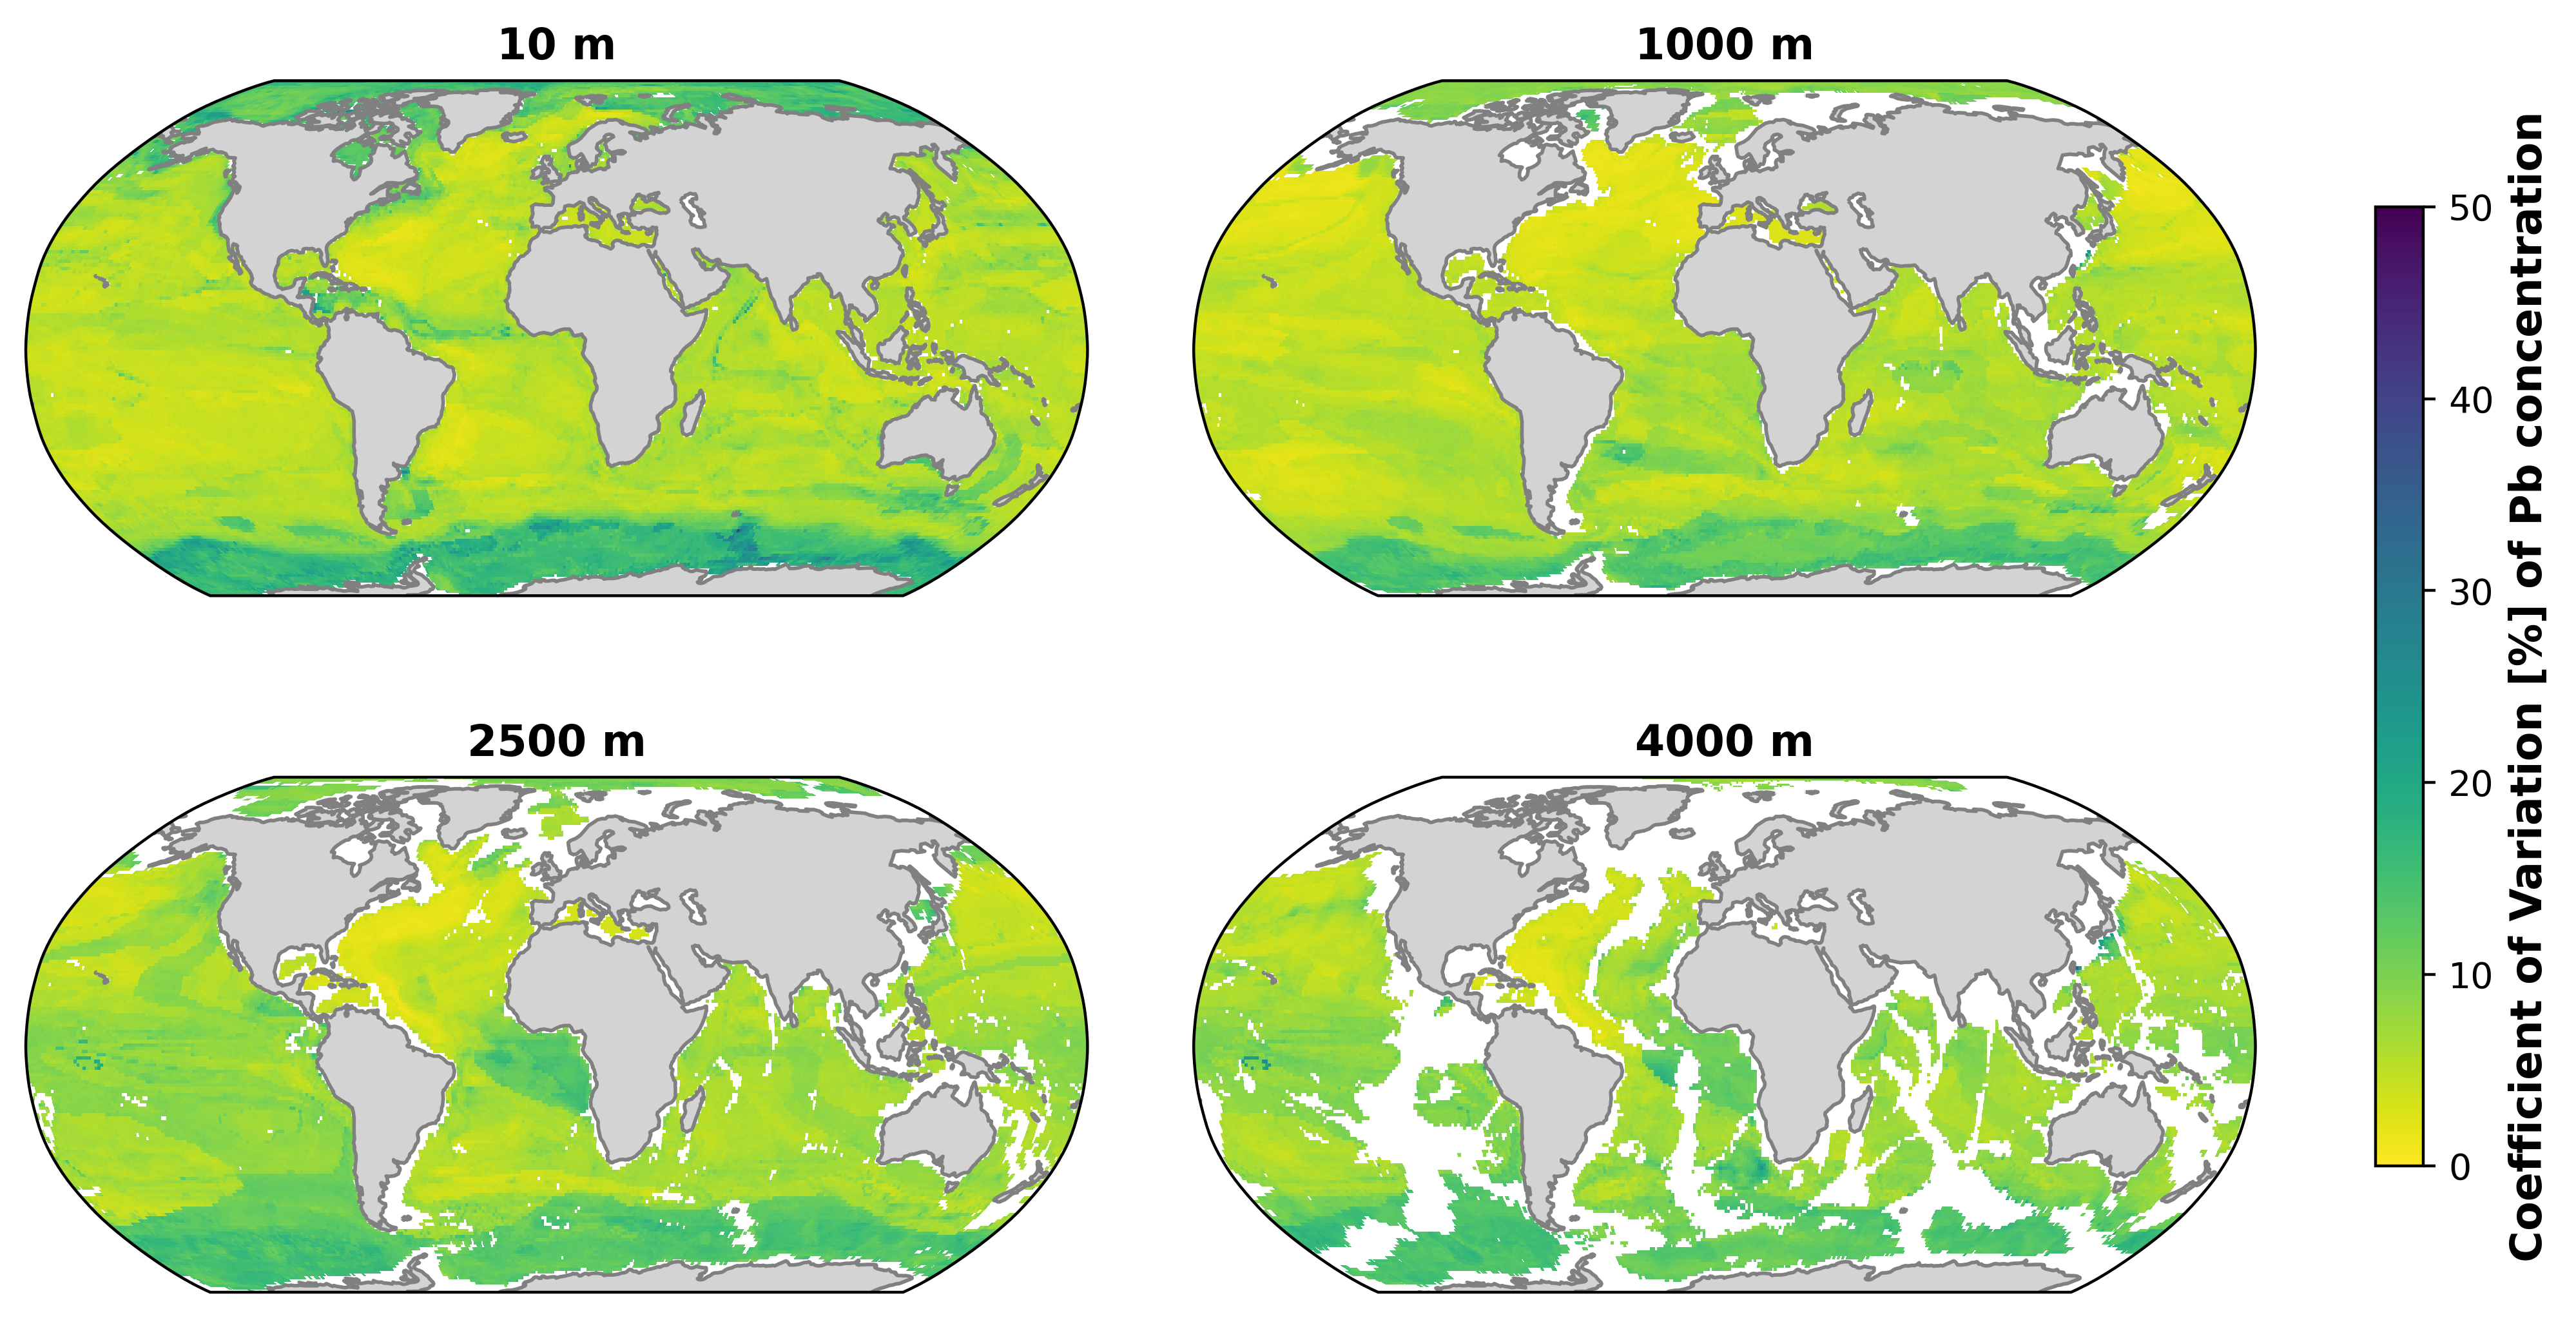

In [10]:
fig, axes = plt.subplots(2,2, figsize=(12,7), dpi = 400, subplot_kw=dict(projection=ccrs.Robinson()), gridspec_kw = {'wspace':0.1, 'hspace':0.005})

for i, ax in enumerate(fig.axes):
    cs = ax.pcolormesh(lon, lat, dfs[i]['Pb_conc_CoV'][0], cmap = 'viridis_r', vmin =0, vmax=50, transform=ccrs.PlateCarree(),alpha=1, shading='auto')
    ax.add_feature(cfeature.LAND, color='lightgrey')
    ax.add_feature(cfeature.COASTLINE, color = 'grey')
    ax.set_title(titles[i], fontweight='bold')
    
fig.colorbar(cs, ax=axes.ravel().tolist(), orientation = 'vertical', fraction = 0.02, pad = 0.05).set_label(label='Coefficient of Variation [%] of Pb concentration', fontweight='bold', fontsize=12)

plt.savefig('../../Figures/For_ms/CoV-Pb_conc-cleanedSO_0-50.jpg')

/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3.11/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ao421/miniconda3/envs/DL_GEOTRACES/lib/python3

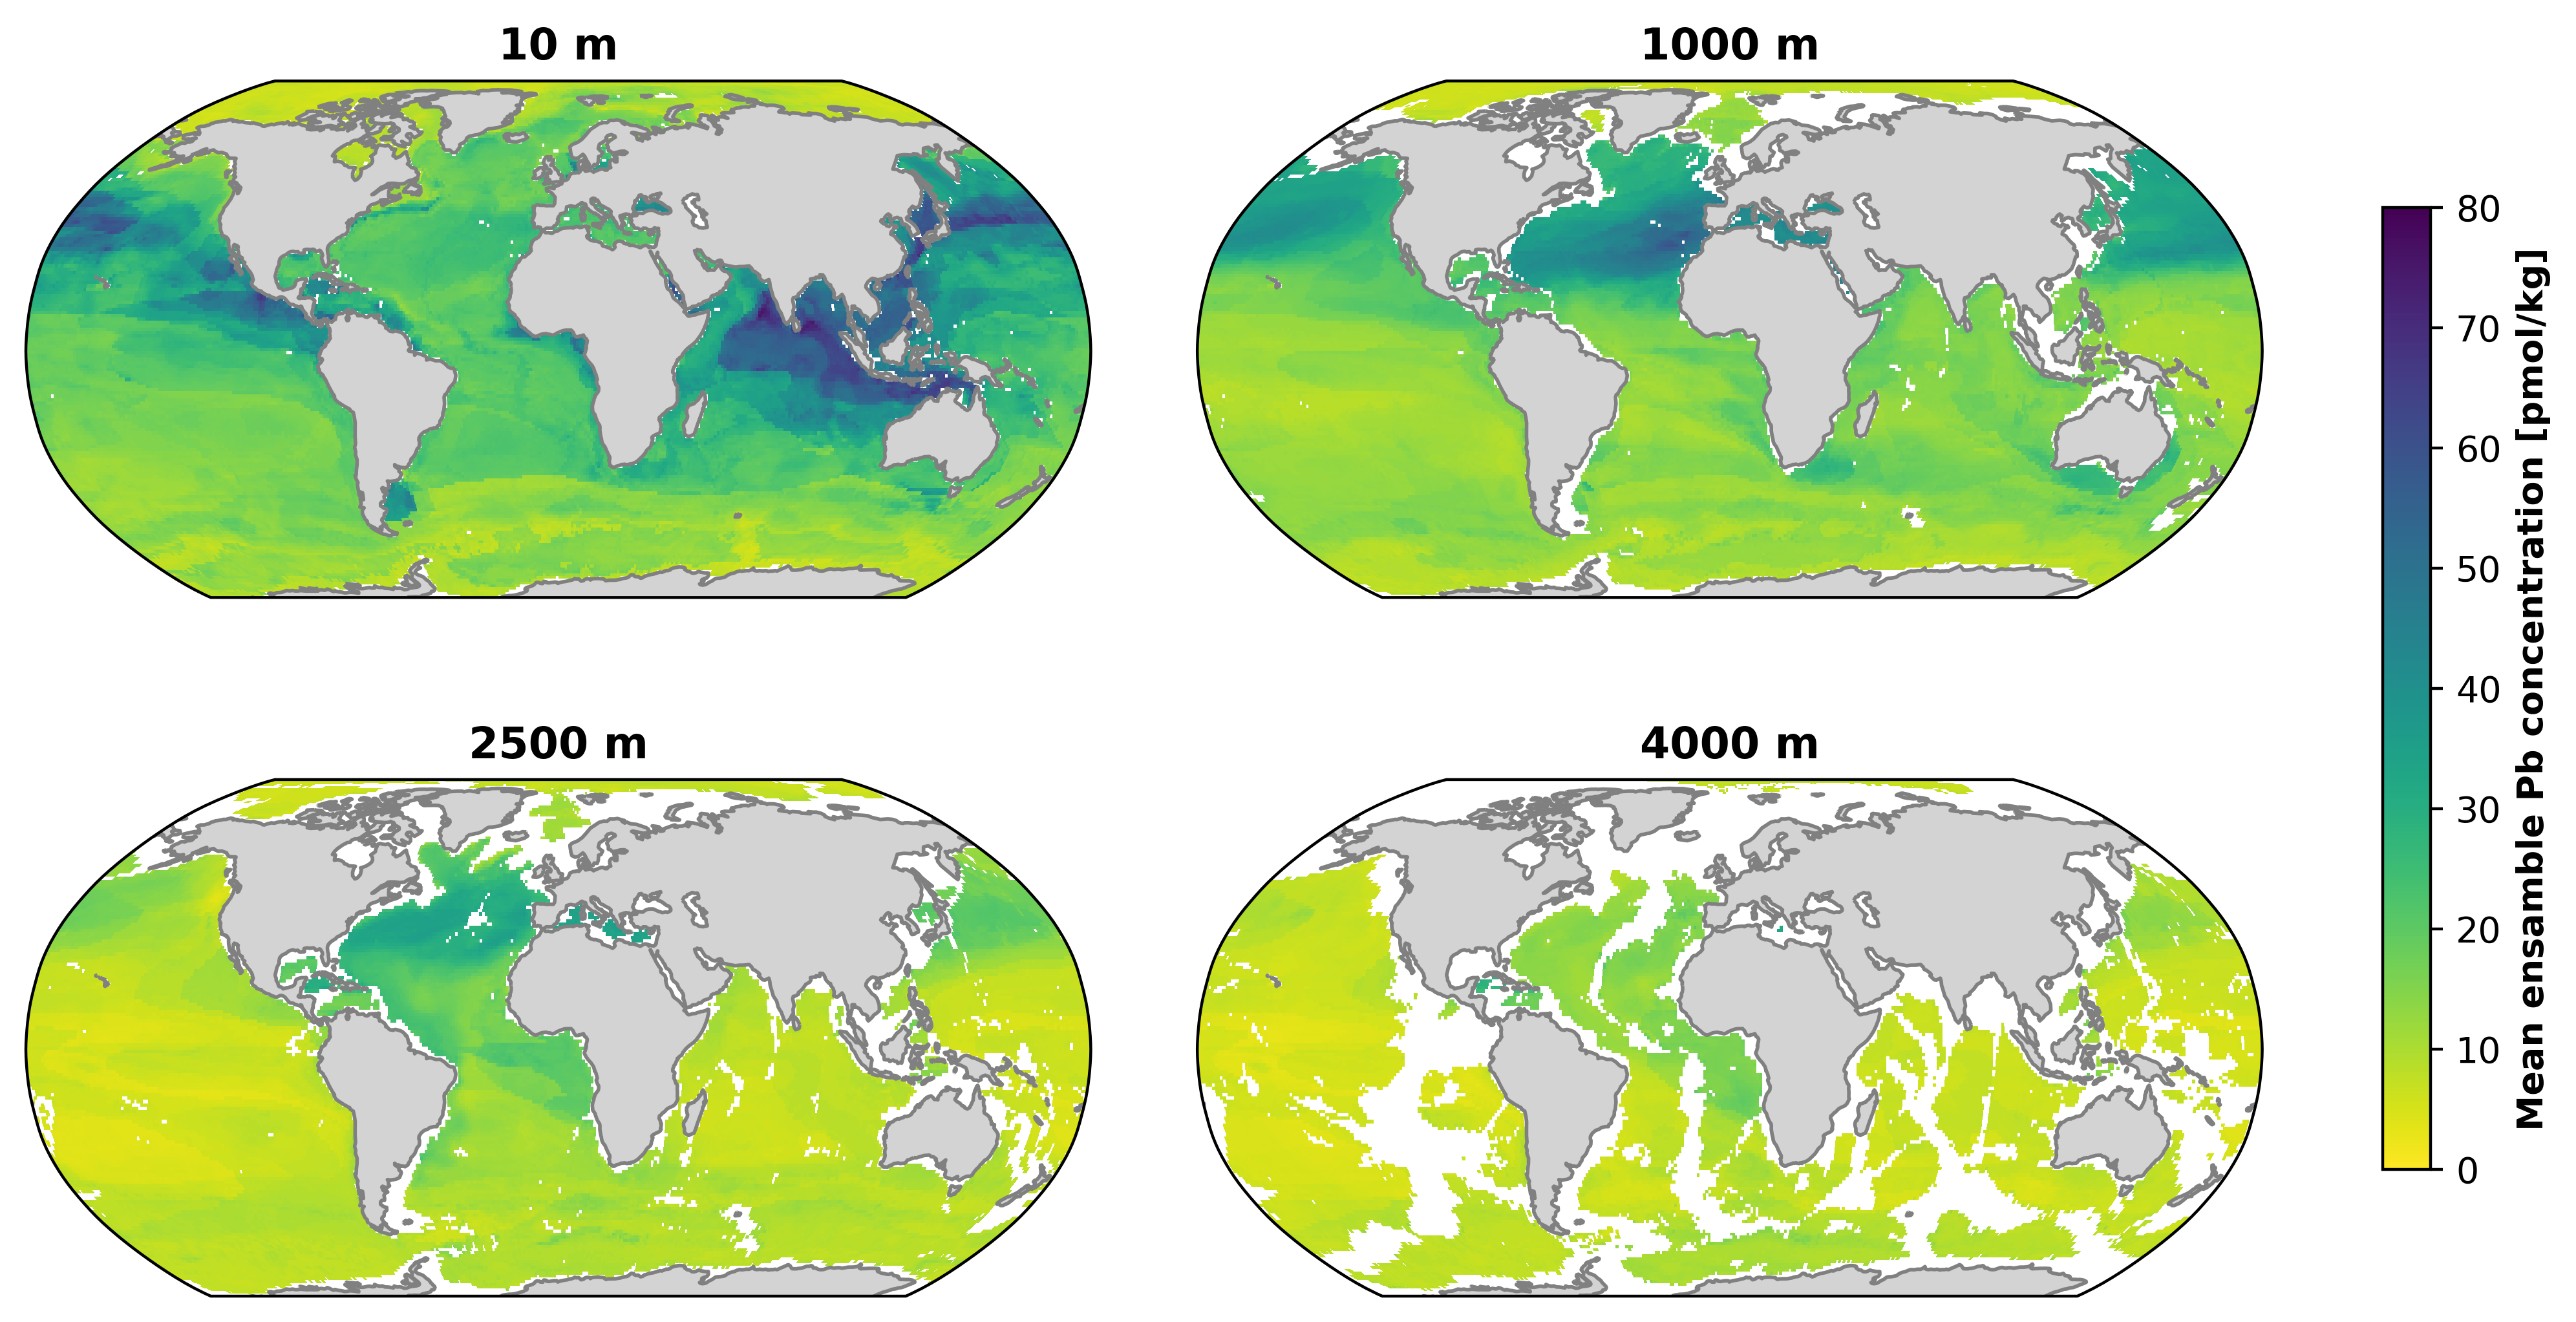

In [9]:
fig, axes = plt.subplots(2,2, figsize=(12,7), dpi = 400, subplot_kw=dict(projection=ccrs.Robinson()), gridspec_kw = {'wspace':0.1, 'hspace':0.005})

for i, ax in enumerate(fig.axes):
    cs = ax.pcolormesh(lon, lat, dfs[i]['Pb_conc_mean'][0], cmap = 'viridis_r', vmin =0, vmax=80, transform=ccrs.PlateCarree(),alpha=1, shading='auto')
    ax.add_feature(cfeature.LAND, color='lightgrey')
    ax.add_feature(cfeature.COASTLINE, color = 'grey')
    ax.set_title(titles[i], fontweight='bold')
    
fig.colorbar(cs, ax=axes.ravel().tolist(), orientation = 'vertical', fraction = 0.02, pad = 0.05).set_label(label='Mean ensamble Pb concentration [pmol/kg]', fontweight='bold')

#plt.savefig('../../Figures/For_ms/CoV-Pb_conc.jpg')